# EDA and Baseline Model for Hit-Predict Project

Resume what we did in the preprocessing notebook...

## Table of Contents
- [Exploratory Data Analysis and Visualizations](#exploratory-data-analysis)
- [Baseline Model](#baseline-model)

## Importing Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import zscore

## Loading Data

In [2]:
DATA_PATH = "../data/processed_spotify_songs.csv"
df = pd.read_csv(DATA_PATH)

In [3]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,edm,r&b,pop,latin,artist_track_encoded,playlist_id_encoded,track_album_id_encoded,release_year,release_month,release_day
count,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,...,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,26671.000000,26671.000000,26671.000000
mean,39.335320,0.463788,0.521398,5.367417,0.699150,0.565533,0.453648,0.449806,0.175032,0.544491,...,0.195295,0.181222,0.181010,0.163622,39.335320,39.335320,39.335320,2012.103146,6.418057,14.198268
std,23.699443,0.188308,0.238359,3.613743,0.099062,0.495696,0.127350,0.248615,0.289067,0.131413,...,0.396435,0.385209,0.385033,0.369938,17.499857,14.908984,23.415735,10.246982,3.735432,9.434473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.548387,0.000000,1957.000000,1.000000,1.000000
25%,21.000000,0.325701,0.335241,2.000000,0.645094,0.000000,0.354797,0.243211,0.000000,0.453020,...,0.000000,0.000000,0.000000,0.000000,28.000000,28.983051,21.888889,2010.000000,3.000000,6.000000
50%,42.000000,0.464561,0.521284,6.000000,0.714462,1.000000,0.408549,0.431212,0.027490,0.503325,...,0.000000,0.000000,0.000000,0.000000,40.666667,38.696970,43.000000,2016.000000,7.000000,14.000000
75%,58.000000,0.597751,0.710649,9.000000,0.769362,1.000000,0.525214,0.639532,0.187693,0.629961,...,0.000000,0.000000,0.000000,0.000000,52.000000,50.740260,58.000000,2019.000000,10.000000,22.000000
max,100.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,97.000000,79.195652,100.000000,2020.000000,12.000000,31.000000


In [4]:
df.head()

,track_artist,track_popularity,track_album_id,track_album_release_date,playlist_id,playlist_subgenre,danceability,energy,key,loudness,...,edm,r&b,pop,latin,artist_track_encoded,playlist_id_encoded,track_album_id_encoded,release_year,release_month,release_day
0,Barbie's Cradle,41.0,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,37i9dQZF1DWYDQ8wBxd7xt,classic rock,0.481351,0.160801,2.0,0.588413,...,0,0,0,0,43.5,43.100000,41.0,2001.0,1.0,1.0
1,RIKA,15.0,1ficfUnZMaY1QkNp15Slzm,2018-01-26,0JmBB9HfrzDiZoPVRdv8ns,neo soul,0.350541,0.495616,5.0,0.715122,...,0,1,0,0,15.0,26.206186,15.0,2018.0,1.0,26.0
2,Steady Rollin,28.0,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,3YouF0u7waJnolytf9JCXf,hard rock,0.095012,0.774400,9.0,0.768273,...,0,0,0,0,29.5,31.697917,28.0,2017.0,11.0,21.0
3,The.madpix.project,24.0,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,5TiiHps0hNCyQ6ijVkNZQs,electropop,0.449432,0.630436,10.0,0.736041,...,0,0,1,0,12.2,39.436364,24.0,2015.0,8.0,7.0
4,YOSA & TAAR,38.0,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,37i9dQZF1DXdOtZGKonFlM,dance pop,0.453533,0.702244,1.0,0.713109,...,0,0,1,0,38.0,35.673469,38.0,2018.0,11.0,16.0


## Exploratory Data Analysis and Visualization
<a id="exploratory-data-analysis"></a>

### Exploration of Variables - Mathilde

**Categorical variables:** track_artist, track_album_id, track_album_release_date, playlist_id, playlist_subgenre, key, playlist_genre, pop, hip hop, metal, rock, edm, r&b, latin.

**Quantitative variables:** track_popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, artist_track_encoded, playlist_id_encoded, track_album_id_encoded, release_year, release_month, release_day.

### Distribution of Target Variable (Popularity) - Mathilde

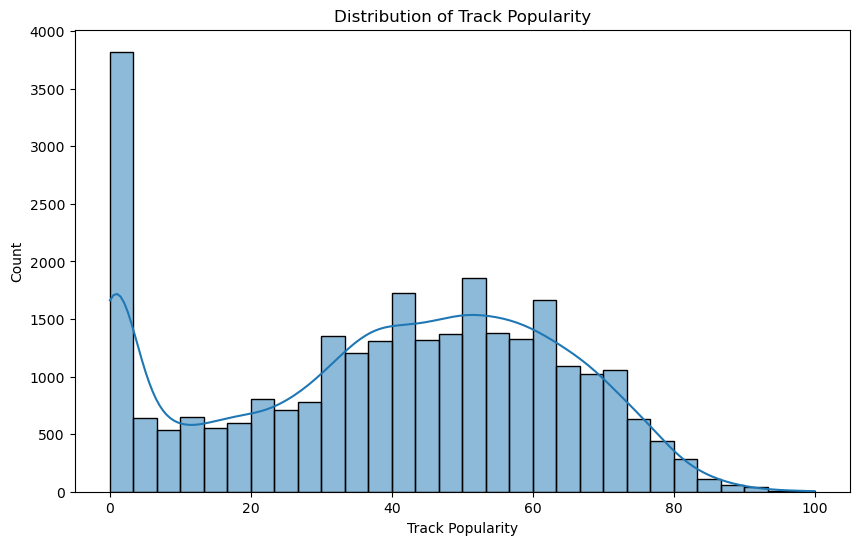

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

#### Dealing with the 0 values in the target variable - Mathilde
##### a. Replacing 0 values with the artist popularity value (which is the mean popularity of all the songs of that artist)

Note that obviously, if some artists only have the single songs (or multiple songs) with popularity 0, then the popularity as 0.

In [6]:
df_0mean = df.copy()
before = (df_0mean['track_popularity'] == 0).sum()
print(before)

artist_popularity = df_0mean.groupby('track_artist')['track_popularity'].transform('mean')
df_0mean['track_popularity'] = df_0mean['track_popularity'].where(df_0mean['track_popularity'] != 0, artist_popularity)

after = (df_0mean['track_popularity'] == 0).sum()
print(after)

print(f"Number of tracks with 0 popularity replaced by artist popularity: {before - after}")

2616
870
Number of tracks with 0 popularity replaced by artist popularity: 1746


We notice that some artists have a lot of songs with popularity 0! 

In [7]:
artists_with_zero_popularity_songs = df_0mean.groupby('track_artist').filter(lambda x: (x['track_popularity'] == 0).any())
artist_song_counts = artists_with_zero_popularity_songs['track_artist'].value_counts()
print(artist_song_counts)

track_artist
Ballin Entertainment    42
CASIOPEA                20
Lisa McClendon          11
T-SQUARE                 8
LemKuuja                 8
                        ..
Suicide Commando         1
Altafulla                1
Salif Keita              1
TV Rock                  1
Two Can                  1
Name: count, Length: 666, dtype: int64


Let's have a look again at the distribution of the target variable, i.e. the popularity of the tracks.

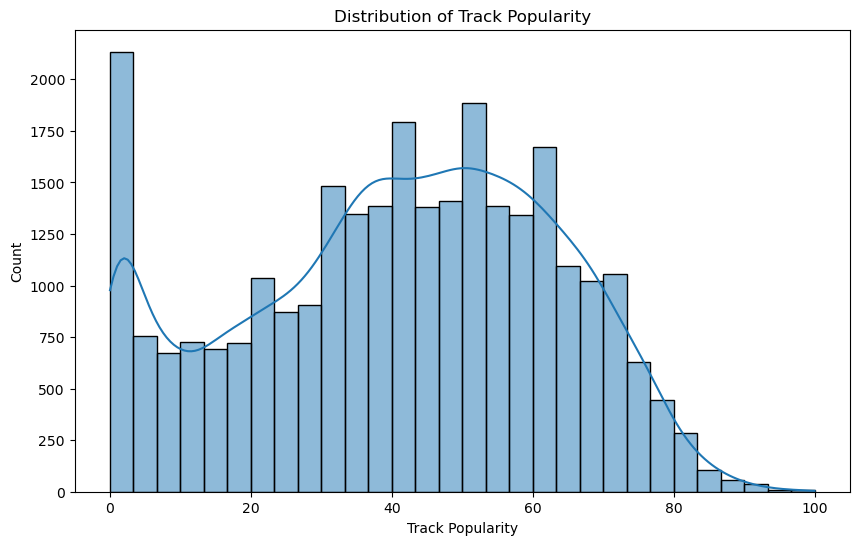

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_0mean["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

That is already better, even though we still have a lot of 0 values, so we would need to account for that in our results' analysis.

Saving the cleaned dataset with the artist popularity values replacing the 0 values in the popularity column:

In [9]:
OUTPUT_PATH= "../data/0mean_data.csv"
df_0mean.to_csv(OUTPUT_PATH, index=False)

##### b. Removing the rows with 0 popularity

In [10]:
df_no0 = df.copy()
print(df_no0.shape)
df_no0 = df_no0[df_no0['track_popularity'] != 0]

print(df_no0.shape)
print("Total number of songs with 0 popularity:", df.shape[0] - df_no0.shape[0])

(28352, 30)
(25736, 30)
Total number of songs with 0 popularity: 2616


Let's have a look again at the distribution of the target variable, i.e. the popularity of the tracks.

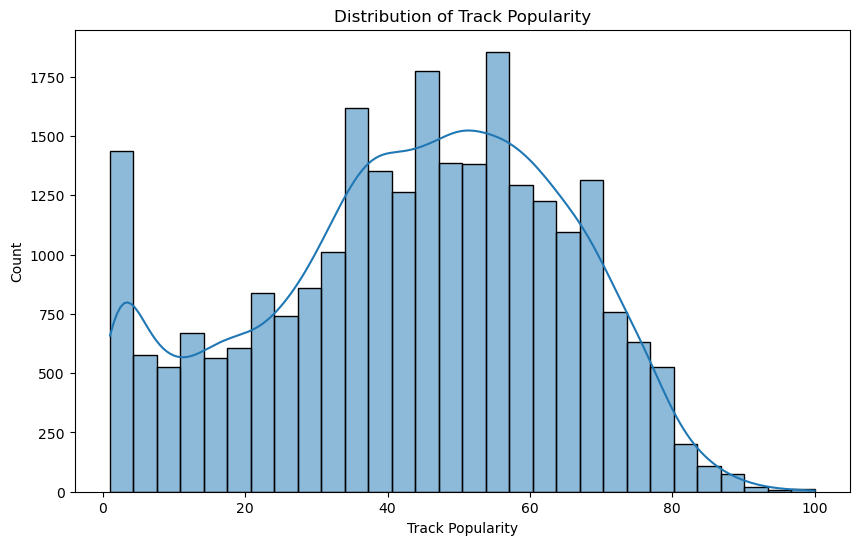

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_no0["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

Now the next bin also has a lot of values, which again is not ideal and we might need to account for that in our results' analysis. Overall, recall that the ideal situation would be to have a normal distribution of the track popularity values.

Saving the cleaned dataset with no 0 values in the popularity column:

In [12]:
OUTPUT_PATH= "../data/no0_data.csv"
df.to_csv(OUTPUT_PATH, index=False)

##### c. Not doing anything

The third option is the easiest, but it might not be the best option. We will explore the first two options and see which one is the best. In that case, there is no need to save the data into a new csv file as it hasn't been modified.

### Distribution of the other Variables - Eliot

### Plotting the different potential predictors against the target variable - Eliot

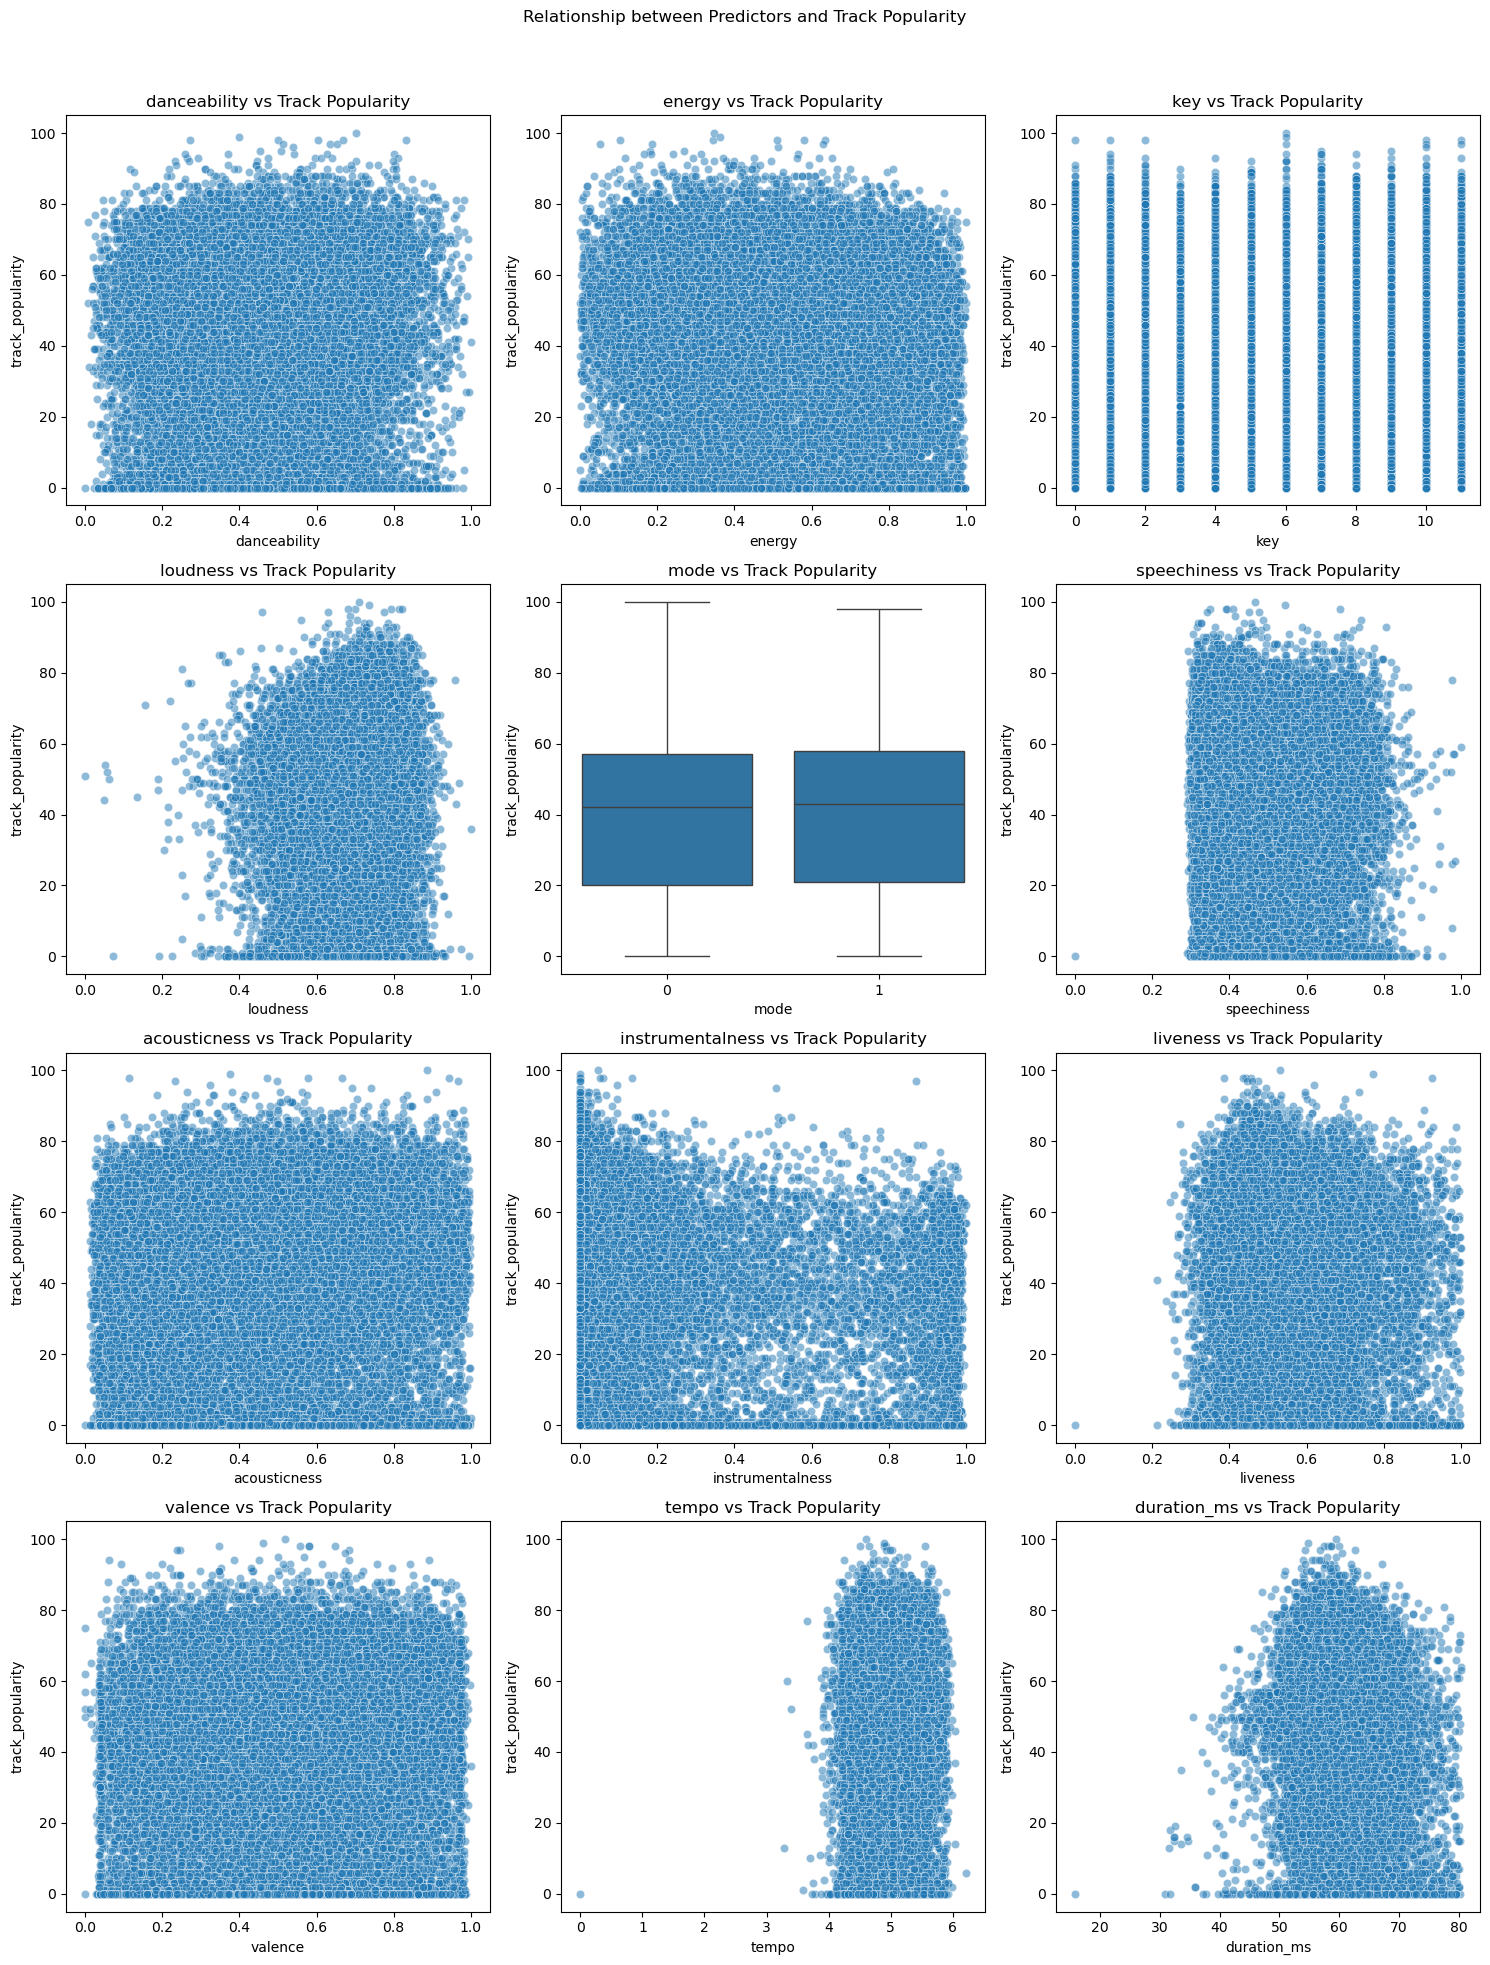

In [13]:
predictors = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle("Relationship between Predictors and Track Popularity")

for ax, predictor in zip(axes.flatten(), predictors):
    if df[predictor].nunique() > 10:
        sns.scatterplot(data=df, x=predictor, y="track_popularity", ax=ax, alpha=0.5)
    else:
        sns.boxplot(data=df, x=predictor, y="track_popularity", ax=ax)
    ax.set_title(f"{predictor} vs Track Popularity")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

What about for artist name, playlist, track album name, genre etc.

### Correlation between features - Eliot

In [14]:
# heatmap ?

### Outlier Analysis - Charlotte

In [15]:
outliers = df[(np.abs(zscore(df[['loudness', 'danceability', 'energy', 'acousticness']])) > 3).any(axis=1)]
print("Number of outliers:", len(outliers))

Number of outliers: 238


In [16]:
# Dealing with outliers?

## Baseline Models - Eliot from modeling.ipynb
<a id="baseline-model"></a>

Baseline Model or Implementation Plan: Finally, you should include a baseline model presented in lecture or a clear plan for its implementation. This can include details on the model architecture, the data used for training and validation, and the evaluation metrics used to assess model performance. 

### Predicting the maximum class the target variable - always predicting popularity 0

In [17]:
# Like in HW4

### Linear Regression

### K-NN Classifier

In [18]:
# See HW2 for good steps on how to proceed

### Previous models?

In [19]:
# From Kaggle

### Comparison according to how the target variable's 0 values were handled to discuss

## Implementation Plan

1. Experiment with different feature engineering techniques, such as polynomial features or interactions.
2. Test additional models, including decision trees, random forests, and neural networks.
3. Tune hyperparameters for optimal model performance.
4. Evaluate models, iteratively improving results.
5. Discussion about the initial choice on how the 0 values in the target variable were handled. In the scenario where we just removed them, predicting the popularity of such songs using our final model and discussing the results.